<a href="https://colab.research.google.com/github/SaraMFawzy022/SQL-case-study-/blob/main/Uber-python-proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**My first python project where I do the following :**


*   imported the appropriate libraries to conduct analysis
*   cleaning data and transforming using Pandas
*   Conducted Exploratory data analysis  
*   Visualized Data using matplotlib





import libraries

In [ ]:

# import libraries

import pandas as pd
import datetime as dt

# define function for split col/drop/rename

def split_cols(df, cols, delimeter):
  # Apply for multiple cols
  for col in cols:
    # Splitted the columns
    splitted_df = df[col].str.split(delimeter, expand = True)
    # Rename the needed columns
    for i in range(splitted_df.shape[1]):
      df[col + '_' + str(i)] = splitted_df[i]
    # Remove the original column
    df = df.drop(col, axis = 1)
  return df




Data cleaning and transformation

In [ ]:


# Reading data
 # change col type to str to be read properly without decimals

col_type = { 'Driver id' : str ,
             'Request id' : str

             }

df = pd.read_csv ('/content/drive/MyDrive/python carerha/Data/Uber Request Data.csv' , dtype = col_type)

# change col type to date

df ['Request timestamp'] = pd.to_datetime (df ['Request timestamp'] , format = 'mixed')
df ['Drop timestamp'] = pd.to_datetime (df ['Drop timestamp'] , format ='mixed')


# separating request/drop time cols from date and leaving one date col instead of two

df ['Request time'] = df['Request timestamp'].dt.hour
df ['Drop time'] = df['Drop timestamp'].dt.hour
df ['Date'] = df['Request timestamp'].dt.date

# dtype turned to object, converting date col to datetime

df ['Date'] = pd.to_datetime (df ['Date'] , format = "mixed")

# drop old timstamp cols

df = df.drop ([	'Request timestamp' , 'Drop timestamp' ] , axis = 1)

df.head()


,Request id,Pickup point,Driver id,Status,Request time,Drop time,Date
0,619,Airport,1,Trip Completed,11,13.0,2016-11-07
1,867,Airport,1,Trip Completed,17,18.0,2016-11-07
2,1807,City,1,Trip Completed,9,9.0,2016-12-07
3,2532,Airport,1,Trip Completed,21,22.0,2016-12-07
4,3112,City,1,Trip Completed,8,9.0,2016-07-13


Data exploration and Visualization

# Kindly Note :
Insights below the chart/table :)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Pivot table : Total successful trips per day:

completed_trips = pd.pivot_table ( df,
                        index = ['Date'],
                        values = ['Drop time'],
                          aggfunc= ['count']
)

completed_trips.head()



,count
,Drop time
Date,
2016-07-13,577
2016-07-14,530
2016-07-15,561
2016-11-07,601
2016-12-07,562


# Insight :
 Average number of succesful trips per day is 566 trips,
 Maximum trips made within the given timeframe is 601 trips on NOV.7th and
Minimum trips number of 530 trips were made on Jul.14th

In [ ]:
# Pivot table :Trip status breakdown :

total_trips = pd.pivot_table ( df,
                        index = ['Status'],
                        columns = ['Date'],
                        values = ['Request id'] ,
                          aggfunc= ['count']
)


total_trips.head(10)

# Insight :
# Top reason for lost trips are due to insufficient number of active drivers which forms approximatley 50% of the total trips made within the given timeframe


count                                            
                  Request id                                            
Date              2016-07-13 2016-07-14 2016-07-15 2016-11-07 2016-12-07
Status                                                                  
Cancelled                270        252        240        262        240
No Cars Available        490        571        580        504        505
Trip Completed           577        530        561        601        562

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


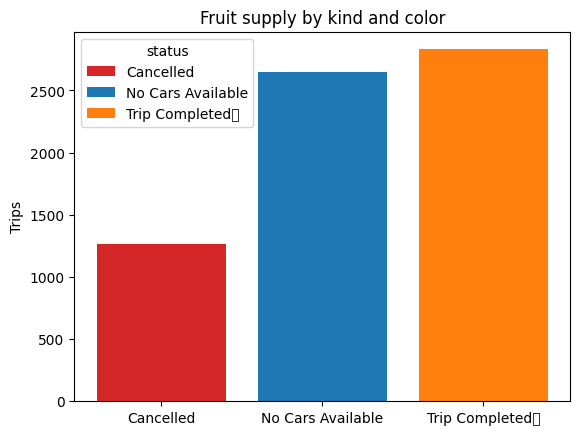

In [ ]:
fig, ax = plt.subplots()

status = ['Cancelled', 'No Cars Available', 'Trip Completed	']
counts = [1264, 2650, 2831]
bar_labels = ['Cancelled', 'No Cars Available', 'Trip Completed	']
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']

ax.bar(status, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Trips')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='status')

plt.show()



#Insight :
Top reason for the lost trips were due to insufficient number of active drivers which forms approximatley 50% of the total trips made within the given timeframe.
Recommendation: UBER needs to hire more drivers in  order to increase drivers availability, cover more areas and decrease the request wait time for a better and more convenient service.

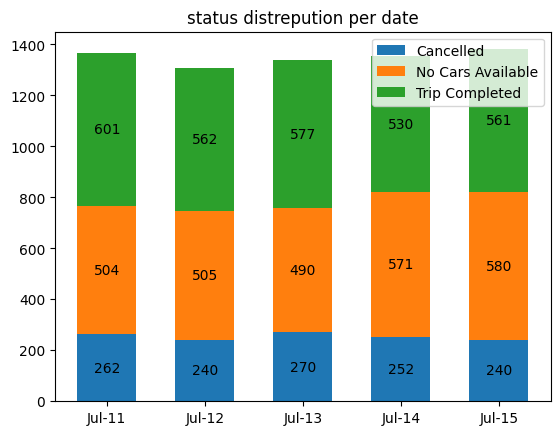

In [ ]:
date = ('Jul-11','Jul-12','Jul-13','Jul-14','Jul-15')
status = {
    'Cancelled': np.array([262, 240, 270,252,240]),
    'No Cars Available': np.array([504, 505, 490, 571, 580]),
    'Trip Completed': np.array([601, 562, 577, 530, 561]),
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(5)

for st, status in status.items():
    p = ax.bar(date , status, width, label=st, bottom=bottom)
    bottom += status

    ax.bar_label(p, label_type='center')

ax.set_title('status distrepution per date')
ax.legend()

plt.show()



#Insight :

Numbers of rides are flactuating through different statuses however it is noticeable that the number of completed trips are decreasing in relation to the "no cars available" missed trips .

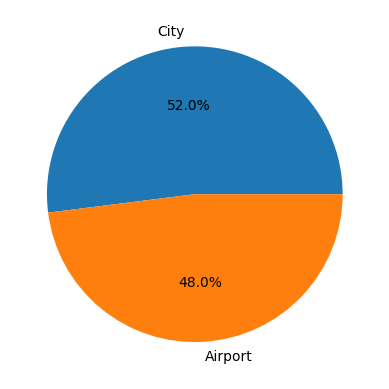

In [ ]:
# Frequency per pickup point

pickup_point = df ['Pickup point'].value_counts()

plt.pie(
    pickup_point,
    labels = pickup_point.index,
    autopct = '%1.1f%%',
);


#Insight :

as presented by the chart , it is obvious that through the given timeframe UBER drivers availaibilty was limited only to two areas which at some point clarifies the reason for the high percentage of the "no cars availble" lost rides. Also, it adds to the first recommendation that more drivers should be hired to be able to distrbute the service as needed.